In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


DATASET'İ İNCELEME

In [3]:
df = pd.read_csv("updated_pollution_dataset.csv")

In [4]:
df["Air Quality"]

0        Moderate
1        Moderate
2        Moderate
3            Good
4            Good
          ...    
4995    Hazardous
4996     Moderate
4997     Moderate
4998         Good
4999     Moderate
Name: Air Quality, Length: 5000, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
#Eksik verilerin kontrolü yapıldı. zaten bi üst satırda kontrol ettim ama bu şekilde de kontrol edilebilir
nan_columns = df.columns[df.isnull().any()].tolist()
print(nan_columns)

[]


In [7]:
# Hiç null değer yok, eksik veri yok, tek kategorik değer hava kalitesi

In [8]:
# Kategorik verilerin benzersiz değer analizi yapıldı. Beklendiği gibi. Alt satırda da aslında kontrol edilebilir. Ben bu şekilde yazmak istedim
df["Air Quality"].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [9]:
"""
Sayısal değişkenlerin betimleyici istatistikleri
"""

'\nSayısal değişkenlerin betimleyici istatistikleri\n'

In [10]:
# Tranpose ile okunulabilirliği artırdım.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


In [11]:
# mean: ortalama,
# std: standart sapma,
# %50: medyan

In [12]:
"""
Korelasyon analizi ile değişkenler arası ilişkilerin incelenmesi.
"""

'\nKorelasyon analizi ile değişkenler arası ilişkilerin incelenmesi.\n'

In [13]:
"""
korelasyonlarına bakalım ama air quality kategorik olduğu için kabul etmiyor.
o yüzden x ve y olarak ayırıp x korelasyonunu hesaplayacağım.
"""

'\nkorelasyonlarına bakalım ama air quality kategorik olduğu için kabul etmiyor.\no yüzden x ve y olarak ayırıp x korelasyonunu hesaplayacağım.\n'

In [14]:
X = df.drop(["Air Quality"], axis=1)
y = df["Air Quality"]

In [15]:
correlation_matrix = X.corr()
print(correlation_matrix)

                               Temperature  Humidity     PM2.5      PM10  \
Temperature                       1.000000  0.466456  0.323840  0.425690   
Humidity                          0.466456  1.000000  0.273366  0.359156   
PM2.5                             0.323840  0.273366  1.000000  0.973005   
PM10                              0.425690  0.359156  0.973005  1.000000   
NO2                               0.591969  0.491977  0.333004  0.439916   
SO2                               0.568082  0.459804  0.299582  0.401849   
CO                                0.685258  0.567540  0.395179  0.518895   
Proximity_to_Industrial_Areas    -0.589564 -0.479646 -0.315766 -0.425018   
Population_Density                0.481692  0.411630  0.278957  0.365734   

                                    NO2       SO2        CO  \
Temperature                    0.591969  0.568082  0.685258   
Humidity                       0.491977  0.459804  0.567540   
PM2.5                          0.333004  0.299582 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

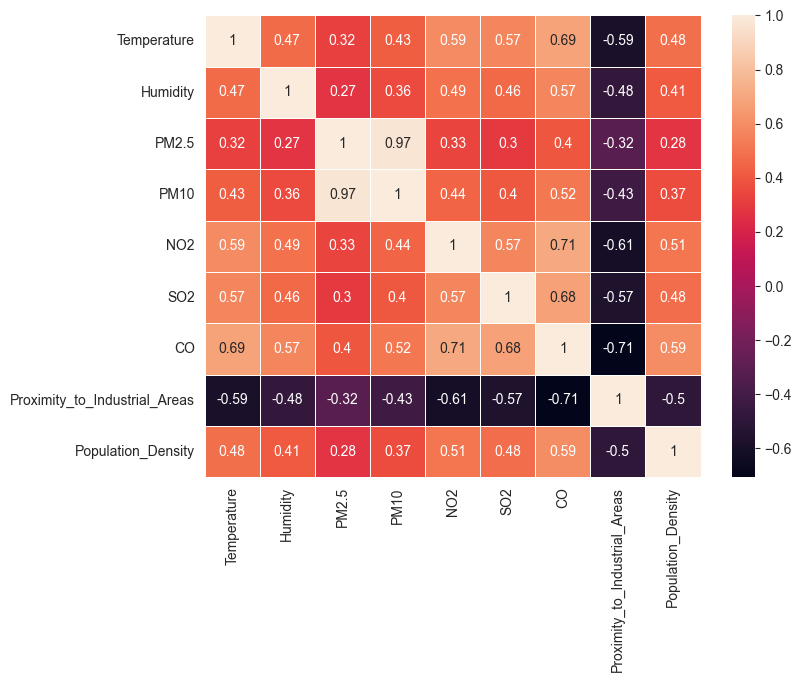

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, linewidth=.7)
plt.show()

In [18]:
"""
1) PM10 ile PM2.5 arasında 0.9'dan fazla ilişki olduğu için boyut indirgeme yaparken birini eleyebiliriz
2) CO ve endüstriyel alana yakınlık arasında negatif bir correlasyon var
3) ilişkiler: PM10-PM2.5, CO-ProximityIA(-0.71), CO-NO2(0.71), CO-Temperature(0.69), CO-SO2(0.68), Proximity-NO2(-0.61)
"""

"\n1) PM10 ile PM2.5 arasında 0.9'dan fazla ilişki olduğu için boyut indirgeme yaparken birini eleyebiliriz\n2) CO ve endüstriyel alana yakınlık arasında negatif bir correlasyon var\n3) ilişkiler: PM10-PM2.5, CO-ProximityIA(-0.71), CO-NO2(0.71), CO-Temperature(0.69), CO-SO2(0.68), Proximity-NO2(-0.61)\n"

In [19]:
"""
Bütün özniteliklerin tek tek kutu grafiğini çizdirmeyeceğim, medyan ile ortalaması arasınd fark olanları ayrı çizdireceğim. Bunlar: PM2.5, PM10, ek olarak SO2'yi de çizdirmek istiyorum. bi tane de toplu çizdirip genel fikrim olsun istiyorum
"""

"\nBütün özniteliklerin tek tek kutu grafiğini çizdirmeyeceğim, medyan ile ortalaması arasınd fark olanları ayrı çizdireceğim. Bunlar: PM2.5, PM10, ek olarak SO2'yi de çizdirmek istiyorum. bi tane de toplu çizdirip genel fikrim olsun istiyorum\n"

In [20]:
"""
Aykırı değerlerin kutu grafikleri ile tespiti.
"""

'\nAykırı değerlerin kutu grafikleri ile tespiti.\n'

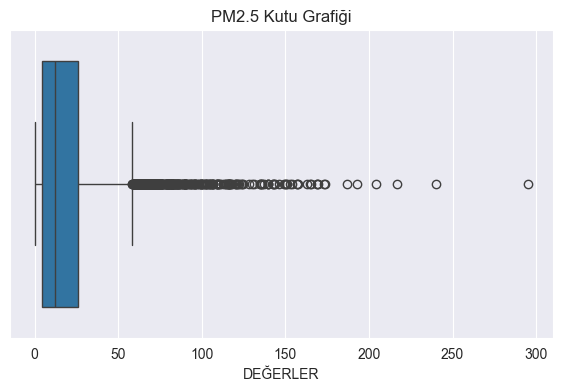

In [21]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df['PM2.5'])
plt.title('PM2.5 Kutu Grafiği')
plt.xlabel('DEĞERLER')
plt.show()

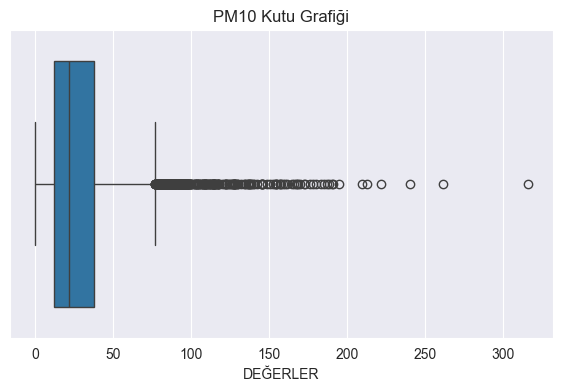

In [22]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df['PM10'])
plt.title('PM10 Kutu Grafiği')
plt.xlabel('DEĞERLER')
plt.show()

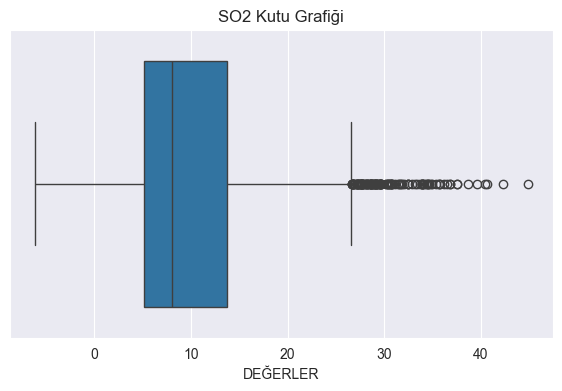

In [23]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df['SO2'])
plt.title('SO2 Kutu Grafiği')
plt.xlabel('DEĞERLER')
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


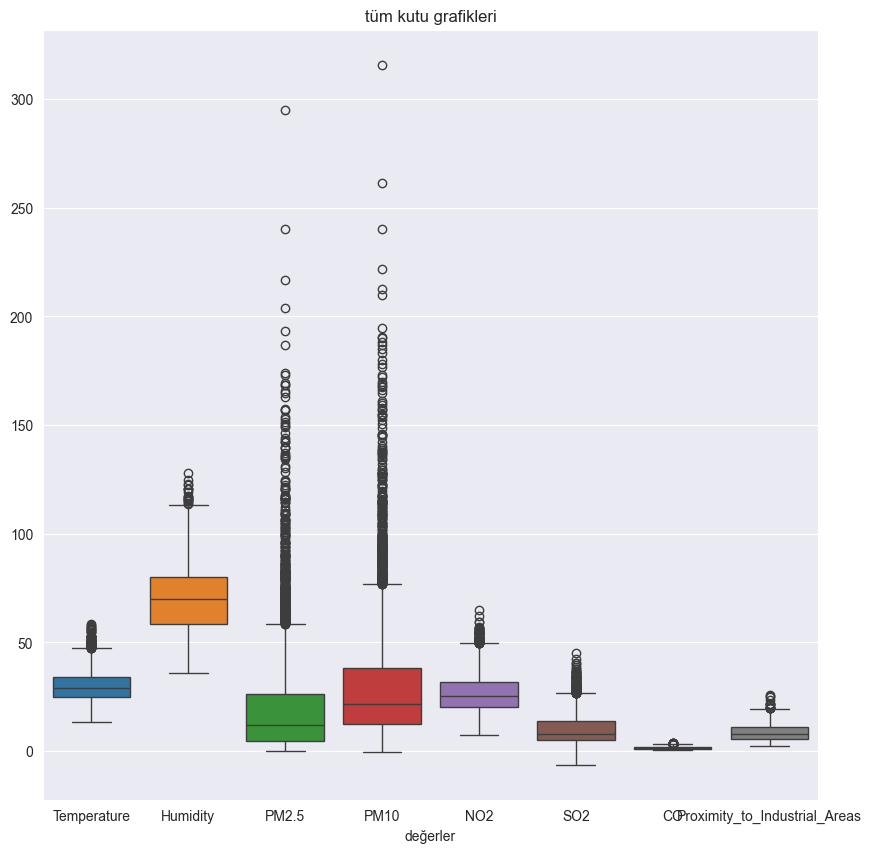

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[["Temperature", "Humidity", "PM2.5", "PM10" , "NO2", "SO2", "CO", "Proximity_to_Industrial_Areas"]])
plt.title("tüm kutu grafikleri")
plt.xlabel("değerler")
plt.show()

In [26]:
"""
Hedef değişkenin dağılımı ve dengesizlik analizi
"""

'\nHedef değişkenin dağılımı ve dengesizlik analizi\n'

In [27]:
target_counts = y.value_counts()
print(target_counts)
print(target_counts / len(df) * 100)  # Yüzdelik dağılım


Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64
Air Quality
Good         40.0
Moderate     30.0
Poor         20.0
Hazardous    10.0
Name: count, dtype: float64


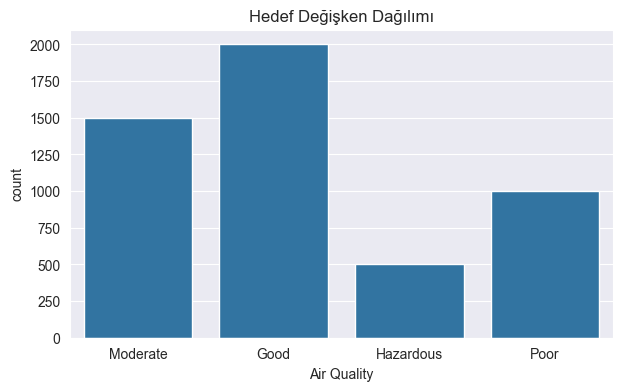

In [28]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Air Quality')
plt.title('Hedef Değişken Dağılımı')
plt.show()

In [30]:
"""
Genel Yorum:
- Eksik verimiz yok.
- Kategorisel veri olarak sadece air quality var. sayısallaşrtıracağım.
- 2 öznitelikte aykırı değerler yüksek. düzeltilecek
- 1 tane çok yüksek, 1 tane yüksek korelasyon ilişkisi var. öznitelik çıkarabilirim.
- Hedef değişkende dengesizlik var. ekleme yapacağım
- Min maks'larda olamayacak değerler var. Örneğin humidity 128. Herkes bilir 128 çok yüksek bir miktar. Bunları kesinlikle kaldıracağım
"""

"\nGenel Yorum:\n- Eksik verimiz yok.\n- Kategorisel veri olarak sadece air quality var. sayısallaşrtıracağım.\n- 2 öznitelikte aykırı değerler yüksek. düzeltilecek\n- 1 tane çok yüksek, 1 tane yüksek korelasyon ilişkisi var. öznitelik çıkarabilirim.\n- Hedef değişkende dengesizlik var. ekleme yapacağım\n- Min maks'larda olamayacak değerler var. Örneğin humidity 128. Herkes bilir 128 çok yüksek bir miktar. Bunları kesinlikle kaldıracağım\n"

Özellik Mühendisliği ve Ön İşleme

In [31]:
"""
kategorik olan hedef değişlenimizi pandasın dummies kütüphanesi ile sayısallaştıracağım
"""

'\nkategorik olan hedef değişlenimizi pandasın dummies kütüphanesi ile sayısallaştıracağım\n'

In [32]:
df.head(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [33]:
df.head(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [34]:
"""
Alttaki ikisini de deneyeceğim hangisi daha iyi sonuç verecekse ona göre karar vereceğim. pd.Series ile ordinal encoding'i deneyeceğim.
"""

"\nAlttaki ikisini de deneyeceğim hangisi daha iyi sonuç verecekse ona göre karar vereceğim. pd.Series ile ordinal encoding'i deneyeceğim.\n"

In [35]:
from sklearn.preprocessing import OrdinalEncoder
df["Air Quality"].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [36]:
quality = [['Hazardous', 'Poor', 'Moderate', 'Good']]


In [37]:
print(y)

0        Moderate
1        Moderate
2        Moderate
3            Good
4            Good
          ...    
4995    Hazardous
4996     Moderate
4997     Moderate
4998         Good
4999     Moderate
Name: Air Quality, Length: 5000, dtype: object


In [38]:
print(df["Air Quality"])

0        Moderate
1        Moderate
2        Moderate
3            Good
4            Good
          ...    
4995    Hazardous
4996     Moderate
4997     Moderate
4998         Good
4999     Moderate
Name: Air Quality, Length: 5000, dtype: object


In [39]:
y_ordinal = OrdinalEncoder(categories=quality)
y = y_ordinal.fit_transform(df[["Air Quality"]])

In [40]:
print(y_ordinal)


OrdinalEncoder(categories=[['Hazardous', 'Poor', 'Moderate', 'Good']])


In [41]:
print(y)

[[2.]
 [2.]
 [2.]
 ...
 [2.]
 [3.]
 [2.]]


In [42]:
df.head(3)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate


In [43]:
# df = pd.get_dummies(df, columns=['Air Quality'])

In [44]:
"""
Sayısal verilerin standardizasyonu (StandardScaler)
"""

'\nSayısal verilerin standardizasyonu (StandardScaler)\n'

In [45]:
"""
CO ve denisty değerleri diğer verilerle uyumsuz olduğu için standart scaler uygulayacağım
"""

'\nCO ve denisty değerleri diğer verilerle uyumsuz olduğu için standart scaler uygulayacağım\n'

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [47]:
X_scaled = scaler.fit_transform(X)


In [48]:

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,-0.034080,-0.690715,-0.608589,-0.450455,-0.844581,-0.120721,0.402303,-0.588658,-1.168163
1,-0.257295,0.349507,-0.726706,-0.658892,0.493329,-0.046643,0.255775,-0.671748,0.743598
2,-1.031106,0.292768,0.267100,0.130973,-0.226219,0.383011,0.237459,-0.893318,0.795975
3,-0.435867,-1.951591,-0.571933,-0.874642,-1.451700,-0.698530,-0.641707,0.740767,0.350770
4,-0.525153,0.040593,-0.539349,-0.519934,-0.507293,-0.654083,-0.898130,1.183909,-1.272917


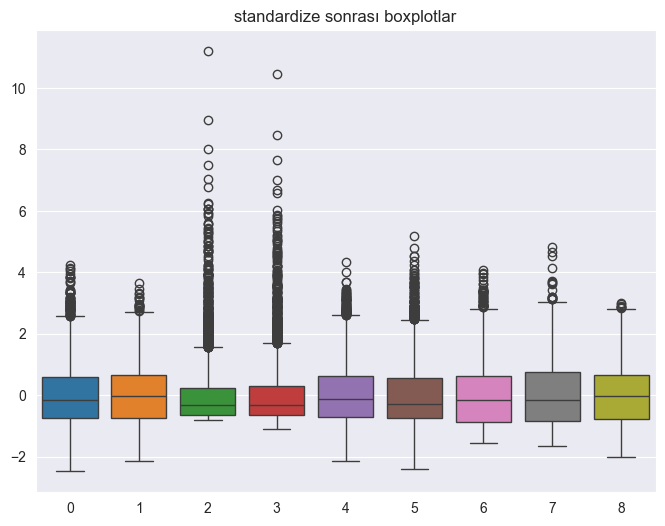

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(X_scaled)
plt.title("standardize sonrası boxplotlar")
plt.show()

In [50]:

outlier_mask = (np.abs(X_scaled) > 6).any(axis=1)
"""
mask_2 = np.abs(X_scaled[:,2]) > 2.0
mask_3 = np.abs(X_scaled[:,3]) > 2.2
"""

'\nmask_2 = np.abs(X_scaled[:,2]) > 2.0\nmask_3 = np.abs(X_scaled[:,3]) > 2.2\n'

In [51]:

combined_mask = ((np.abs(X_scaled) > 3).any(axis=1)) # | mask_2 | mask_3
X_scaled = X_scaled[~combined_mask]
y = y[~combined_mask]


<Axes: >

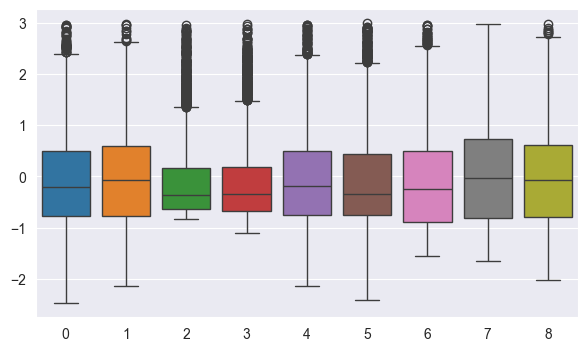

In [52]:
plt.figure(figsize=(7,4))
sns.boxplot(X_scaled)

In [53]:
"""
#varyansı düşük diye pm2.5'i çıkaracağım
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled = X_scaled.drop(columns=["PM2.5"])
"""

'\n#varyansı düşük diye pm2.5\'i çıkaracağım\nX_scaled = pd.DataFrame(X_scaled, columns=X.columns)\nX_scaled = X_scaled.drop(columns=["PM2.5"])\n'

In [54]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Kullanılan özellikler:", X_scaled_df.columns.tolist())
print(f"Özellik sayısı: {X_scaled_df.shape[1]}")


Kullanılan özellikler: ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
Özellik sayısı: 9


In [55]:
# Şimdi veri üreterek hedef değişkeni dengeleyeceğim
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(X_scaled_df, y)

In [56]:
print("Orijinal dağılım:")
print(pd.Series(y.ravel()).value_counts())
print("\nSMOTE sonrası:")
print(pd.Series(y_balanced).value_counts())

Orijinal dağılım:
3.0    1984
2.0    1485
1.0     951
0.0     321
Name: count, dtype: int64

SMOTE sonrası:
2.0    1984
3.0    1984
0.0    1984
1.0    1984
Name: count, dtype: int64


In [57]:
"""
şunu fark ettim: verilerin y kategorilerinden iyiden kötüye doğru azalan sayısı arttı. yani en az good'tan en fazla hazardoustan gitti.
"""

"\nşunu fark ettim: verilerin y kategorilerinden iyiden kötüye doğru azalan sayısı arttı. yani en az good'tan en fazla hazardoustan gitti.\n"

In [58]:
print(x_balanced)

      Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0       -0.034080 -0.690715 -0.608589 -0.450455 -0.844581 -0.120721  0.402303   
1       -0.257295  0.349507 -0.726706 -0.658892  0.493329 -0.046643  0.255775   
2       -1.031106  0.292768  0.267100  0.130973 -0.226219  0.383011  0.237459   
3       -0.435867 -1.951591 -0.571933 -0.874642 -1.451700 -0.698530 -0.641707   
4       -0.525153  0.040593 -0.539349 -0.519934 -0.507293 -0.654083 -0.898130   
...           ...       ...       ...       ...       ...       ...       ...   
7931    -0.576199  1.208008 -0.647275 -0.807509 -0.927358  0.029738  0.210897   
7932    -0.406710 -1.278147  0.656440  0.559071 -0.195280  0.061115 -0.196835   
7933     0.162992 -0.214906 -0.561970 -0.510742  0.292931 -0.573799 -0.162027   
7934    -0.135305 -0.045789 -0.109613  0.030830 -0.827133  0.085990 -0.413708   
7935    -0.549620  0.069773 -0.172878 -0.141017 -0.111480 -0.280941  0.827333   

      Proximity_to_Industri

In [59]:
print("İlk 20 eleman:", y_balanced[:20])


İlk 20 eleman: [2. 2. 2. 3. 3. 0. 1. 2. 1. 1. 3. 2. 3. 3. 3. 2. 3. 1. 2. 1.]


In [60]:
"""
from sklearn.manifold import TSNE

# Sadece 2D görselleştirme için
tsne = TSNE(n_components=2,
           perplexity=30,    # Komşuluk boyutu
           random_state=42,
           max_iter=1000)

X_tsne = tsne.fit_transform(x_balanced)

# Görselleştir
plt.figure(figsize=(7,4))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_balanced, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE ile Görselleştirme')

# Sınıflar kümelenmişse iyi ayrım var demektir
"""

"\nfrom sklearn.manifold import TSNE\n\n# Sadece 2D görselleştirme için\ntsne = TSNE(n_components=2,\n           perplexity=30,    # Komşuluk boyutu\n           random_state=42,\n           max_iter=1000)\n\nX_tsne = tsne.fit_transform(x_balanced)\n\n# Görselleştir\nplt.figure(figsize=(7,4))\nscatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_balanced, cmap='viridis')\nplt.colorbar(scatter)\nplt.title('t-SNE ile Görselleştirme')\n\n# Sınıflar kümelenmişse iyi ayrım var demektir\n"

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_reduced = pca.fit_transform(x_balanced)

In [62]:
#PCA'den sonra tekrar train test split yapcam
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_balanced, test_size=0.2, random_state=42)

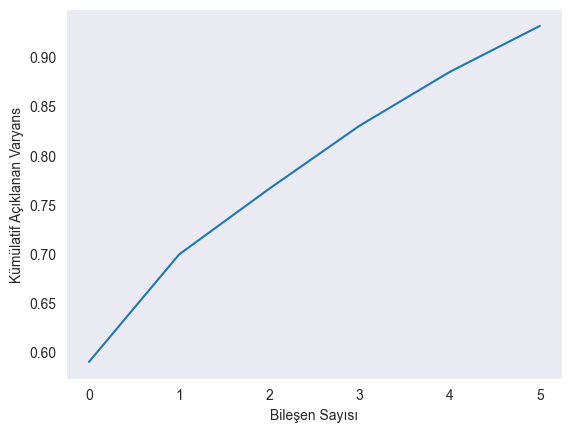

In [63]:
explained = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained))
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Kümülatif Açıklanan Varyans')
plt.grid()
plt.show()

In [64]:
print(pca.explained_variance_ratio_)

[0.58982473 0.10929288 0.06680988 0.0639443  0.0547304  0.04678627]


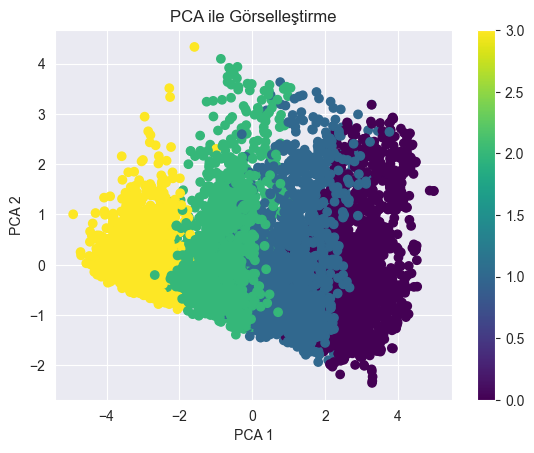

In [65]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_balanced, cmap='viridis')  # y_balanced varsa etiket olarak
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA ile Görselleştirme')
plt.colorbar()
plt.show()


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


LOGISTIC REGRESSION

In [67]:
reg = LogisticRegression()
model = reg.fit(X_train, y_train)

In [68]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [69]:
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 0.8941


In [70]:
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

Test Verisi Doğruluğu (Testing Accuracy): 0.9055


In [71]:
enet_logistic = LogisticRegression(
    penalty='elasticnet',
    C=2.0,              # alpha'nın tersi (1/alpha)
    l1_ratio=0.5,       # L1 ve L2 karışımı
    solver='saga',      # ElasticNet için gerekli
    max_iter=1000)

enet_logistic.fit(X_train, y_train)
y_pred_train_enet = enet_logistic.predict(X_train)
y_pred_test_enet = enet_logistic.predict(X_test)

In [72]:
train_accuracy_enet = accuracy_score(y_train, y_pred_train_enet)
print(f"Elastic Net Logistic - Eğitim Doğruluğu: {train_accuracy_enet:.4f}")
test_accuracy_enet = accuracy_score(y_test, y_pred_test_enet)
print(f"Elastic Net Logistic - Test Doğruluğu: {test_accuracy_enet:.4f}")

Elastic Net Logistic - Eğitim Doğruluğu: 0.8948
Elastic Net Logistic - Test Doğruluğu: 0.9055


In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       348
         1.0       0.83      0.82      0.83       422
         2.0       0.92      0.93      0.92       390
         3.0       0.99      0.99      0.99       428

    accuracy                           0.91      1588
   macro avg       0.90      0.90      0.90      1588
weighted avg       0.91      0.91      0.91      1588

[[303  45   0   0]
 [ 46 347  29   0]
 [  0  24 363   3]
 [  0   0   3 425]]


In [75]:
print("\n=== ELASTIC NET KARŞILAŞTIRMASI ===")
print(f"Logistic Regression    - Test Accuracy: {test_accuracy:.4f}")
print(f"Elastic Net Logistic   - Test Accuracy: {test_accuracy_enet:.4f}")
print(f"Logistic Regression    - Training Accuracy: {train_accuracy:.4f}")
print(f"Elastic Net Logistic   - Training Accuracy: {train_accuracy_enet:.4f}")


=== ELASTIC NET KARŞILAŞTIRMASI ===
Logistic Regression    - Test Accuracy: 0.9055
Elastic Net Logistic   - Test Accuracy: 0.9055
Logistic Regression    - Training Accuracy: 0.8941
Elastic Net Logistic   - Training Accuracy: 0.8948


In [76]:
"""
Overfitting yok.
"""

'\nOverfitting yok.\n'

DECISION TREE

In [77]:
for i in range(8,18) :
    tree = DecisionTreeClassifier(random_state=42, max_depth= i)
    model = tree.fit(X_train, y_train)

    rf_y_pred_train = model.predict(X_train)
    rf_y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, rf_y_pred_train)
    #print(f"Eğitim Verisi Doğruluğu (Training Accuracy): i:{i} {train_accuracy:.4f}")
    test_accuracy = accuracy_score(y_test, rf_y_pred_test)
    #print(f"Test Verisi Doğruluğu (Testing Accuracy): i:{i} {test_accuracy:.4f}")
    min = 2
    if train_accuracy - test_accuracy < min:
        min = train_accuracy - test_accuracy
        print(f"Eğitim Verisi Doğruluğu (Training Accuracy): i:{i} {train_accuracy:.4f}")
        print(f"Test Verisi Doğruluğu (Testing Accuracy): i:{i} {test_accuracy:.4f}")
        print(f"min: {min}, /n i {i}")

Eğitim Verisi Doğruluğu (Training Accuracy): i:8 0.9256
Test Verisi Doğruluğu (Testing Accuracy): i:8 0.8992
min: 0.026401540222113273, /n i 8
Eğitim Verisi Doğruluğu (Training Accuracy): i:9 0.9386
Test Verisi Doğruluğu (Testing Accuracy): i:9 0.9068
min: 0.03176231947546104, /n i 9
Eğitim Verisi Doğruluğu (Training Accuracy): i:10 0.9540
Test Verisi Doğruluğu (Testing Accuracy): i:10 0.9144
min: 0.0396435776197982, /n i 10
Eğitim Verisi Doğruluğu (Training Accuracy): i:11 0.9671
Test Verisi Doğruluğu (Testing Accuracy): i:11 0.9099
min: 0.0571266223202056, /n i 11
Eğitim Verisi Doğruluğu (Training Accuracy): i:12 0.9772
Test Verisi Doğruluğu (Testing Accuracy): i:12 0.9074
min: 0.0697274295718201, /n i 12
Eğitim Verisi Doğruluğu (Training Accuracy): i:13 0.9836
Test Verisi Doğruluğu (Testing Accuracy): i:13 0.9118
min: 0.07177809627657972, /n i 13
Eğitim Verisi Doğruluğu (Training Accuracy): i:14 0.9887
Test Verisi Doğruluğu (Testing Accuracy): i:14 0.9169
min: 0.07178127068324347, /

In [78]:
tree = DecisionTreeClassifier(random_state=42, max_depth= 12)
model = tree.fit(X_train, y_train)

In [79]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [80]:
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 0.9772
Test Verisi Doğruluğu (Testing Accuracy): 0.9074


In [81]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88       348
         1.0       0.84      0.84      0.84       422
         2.0       0.91      0.92      0.91       390
         3.0       0.99      0.98      0.99       428

    accuracy                           0.91      1588
   macro avg       0.91      0.91      0.91      1588
weighted avg       0.91      0.91      0.91      1588

[[309  39   0   0]
 [ 41 354  27   0]
 [  1  27 359   3]
 [  0   0   9 419]]


In [82]:
"""
train sonucundan anlaşılıyor ki maX depth sayısı vermediğimizde modelimiz ezberlemiş. o zaman dal kısaltalım. kısalttım ve max depth 12'nin local optima olduğunu düşünüyorum
"""

"\ntrain sonucundan anlaşılıyor ki maX depth sayısı vermediğimizde modelimiz ezberlemiş. o zaman dal kısaltalım. kısalttım ve max depth 12'nin local optima olduğunu düşünüyorum\n"

RANDOM FOREST

In [83]:

for i in range(6,12):
    forest = RandomForestClassifier(random_state=42, max_depth=i)
    model = forest.fit(X_train, y_train)
    rf_y_pred_train = model.predict(X_train)
    rf_y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, rf_y_pred_train)
    #print(f"Eğitim Verisi Doğruluğu (Training Accuracy): i:{i} {train_accuracy:.4f}")
    test_accuracy = accuracy_score(y_test, rf_y_pred_test)
    #print(f"Test Verisi Doğruluğu (Testing Accuracy): i:{i} {test_accuracy:.4f}")
    min = 2
    if train_accuracy - test_accuracy < min:
        min = train_accuracy - test_accuracy
        print(f"Eğitim Verisi Doğruluğu (Training Accuracy): i:{i} {train_accuracy:.4f}")
        print(f"Test Verisi Doğruluğu (Testing Accuracy): i:{i} {test_accuracy:.4f}")
        print(f"min: {min}, /n i {i}")



Eğitim Verisi Doğruluğu (Training Accuracy): i:6 0.9047
Test Verisi Doğruluğu (Testing Accuracy): i:6 0.9081
min: -0.003366061466036241, /n i 6
Eğitim Verisi Doğruluğu (Training Accuracy): i:7 0.9181
Test Verisi Doğruluğu (Testing Accuracy): i:7 0.9118
min: 0.006245645110858233, /n i 7
Eğitim Verisi Doğruluğu (Training Accuracy): i:8 0.9302
Test Verisi Doğruluğu (Testing Accuracy): i:8 0.9169
min: 0.01333766639842937, /n i 8
Eğitim Verisi Doğruluğu (Training Accuracy): i:9 0.9439
Test Verisi Doğruluğu (Testing Accuracy): i:9 0.9200
min: 0.023894155758611757, /n i 9
Eğitim Verisi Doğruluğu (Training Accuracy): i:10 0.9592
Test Verisi Doğruluğu (Testing Accuracy): i:10 0.9301
min: 0.029098992284604663, /n i 10
Eğitim Verisi Doğruluğu (Training Accuracy): i:11 0.9701
Test Verisi Doğruluğu (Testing Accuracy): i:11 0.9326
min: 0.037449665814338395, /n i 11


In [84]:
"""
Burada max depthe karar vermek için for döngüsüne aldım 11 mantıklı geldi.
"""

'\nBurada max depthe karar vermek için for döngüsüne aldım 11 mantıklı geldi.\n'

In [85]:
forest = RandomForestClassifier(random_state=42, max_depth=11)
model = forest.fit(X_train, y_train)
rf_y_pred_train = model.predict(X_train)
rf_y_pred_test = model.predict(X_test)

In [86]:
train_accuracy = accuracy_score(y_train, rf_y_pred_train)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
test_accuracy = accuracy_score(y_test, rf_y_pred_test)
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 0.9701
Test Verisi Doğruluğu (Testing Accuracy): 0.9326


In [87]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88       348
         1.0       0.84      0.84      0.84       422
         2.0       0.91      0.92      0.91       390
         3.0       0.99      0.98      0.99       428

    accuracy                           0.91      1588
   macro avg       0.91      0.91      0.91      1588
weighted avg       0.91      0.91      0.91      1588

[[309  39   0   0]
 [ 41 354  27   0]
 [  1  27 359   3]
 [  0   0   9 419]]


SVM

In [88]:
"""
bizim problemimiz classification olduğu için SVR yapmadım.
"""

'\nbizim problemimiz classification olduğu için SVR yapmadım.\n'

In [89]:
from sklearn.svm import SVC

In [90]:
#RBF KERNEL
svm = SVC(random_state=42, kernel='rbf', C=1.0, gamma='scale')
model = svm.fit(X_train, y_train)
svm_rbf_pred_train = model.predict(X_train)
svm_rbf_pred_test = model.predict(X_test)

In [91]:
print("SVM RBF Train Accuracy:", accuracy_score(y_train, svm_rbf_pred_train))
print("SVM RBF Test Accuracy:", accuracy_score(y_test, svm_rbf_pred_test))

SVM RBF Train Accuracy: 0.915406427221172
SVM RBF Test Accuracy: 0.9269521410579346


In [92]:
print(classification_report(y_test, svm_rbf_pred_test))
print(confusion_matrix(y_test, svm_rbf_pred_test))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       348
         1.0       0.89      0.85      0.87       422
         2.0       0.92      0.96      0.94       390
         3.0       0.99      1.00      0.99       428

    accuracy                           0.93      1588
   macro avg       0.92      0.93      0.93      1588
weighted avg       0.93      0.93      0.93      1588

[[314  34   0   0]
 [ 36 357  29   0]
 [  0  12 375   3]
 [  0   0   2 426]]


In [93]:
#LINEAR KERNEL
svm_linear = SVC(random_state=42, kernel='linear', C=1.0)
model_linear = svm_linear.fit(X_train, y_train)
svm_linear_pred_train = model_linear.predict(X_train)
svm_linear_pred_test = model_linear.predict(X_test)

In [94]:
print("SVM Linear Train Accuracy:", accuracy_score(y_train, svm_linear_pred_train))
print("SVM Linear Test Accuracy:", accuracy_score(y_test, svm_linear_pred_test))

SVM Linear Train Accuracy: 0.8954001260239446
SVM Linear Test Accuracy: 0.9055415617128464


In [95]:
print(classification_report(y_test, svm_linear_pred_test))
print(confusion_matrix(y_test, svm_linear_pred_test))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       348
         1.0       0.84      0.82      0.83       422
         2.0       0.91      0.94      0.93       390
         3.0       0.99      0.99      0.99       428

    accuracy                           0.91      1588
   macro avg       0.90      0.90      0.90      1588
weighted avg       0.91      0.91      0.91      1588

[[304  44   0   0]
 [ 47 345  30   0]
 [  0  22 365   3]
 [  0   0   4 424]]


In [96]:
#POLY KERNEL
svm_poly = SVC(random_state=42, kernel='poly', degree=3, C=1.0)
model_poly = svm_poly.fit(X_train, y_train)
svm_poly_pred_train = model_poly.predict(X_train)
svm_poly_pred_test = model_poly.predict(X_test)

In [97]:
print("SVM Poly Train Accuracy:", accuracy_score(y_train, svm_poly_pred_train))
print("SVM Poly Test Accuracy:", accuracy_score(y_test, svm_poly_pred_test))
print(classification_report(y_test, svm_poly_pred_test))
print(confusion_matrix(y_test, svm_poly_pred_test))

SVM Poly Train Accuracy: 0.9029615626969124
SVM Poly Test Accuracy: 0.9124685138539043
              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88       348
         1.0       0.86      0.82      0.84       422
         2.0       0.88      0.97      0.92       390
         3.0       1.00      1.00      1.00       428

    accuracy                           0.91      1588
   macro avg       0.91      0.91      0.91      1588
weighted avg       0.91      0.91      0.91      1588

[[299  48   1   0]
 [ 29 345  48   0]
 [  0   9 379   2]
 [  0   0   2 426]]


In [98]:
# Modelleri karşılaştır
models = {
    'SVM RBF': (svm_rbf_pred_train, svm_rbf_pred_test),
    'SVM Linear': (svm_linear_pred_train, svm_linear_pred_test),
    'SVM Poly': (svm_poly_pred_train, svm_poly_pred_test)
}

print("Model Performans Karşılaştırması:")
print("-" * 50)
for name, (train_pred, test_pred) in models.items():
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    print(f"{name:15} | Train: {train_acc:.4f} | Test: {test_acc:.4f}")

Model Performans Karşılaştırması:
--------------------------------------------------
SVM RBF         | Train: 0.9154 | Test: 0.9270
SVM Linear      | Train: 0.8954 | Test: 0.9055
SVM Poly        | Train: 0.9030 | Test: 0.9125


KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
classifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
classifier.fit(X_train, y_train)
knn_y_pred_train = classifier.predict(X_train)
knn_y_pred_test = classifier.predict(X_test)

In [101]:
print("Train Accuracy:", accuracy_score(y_train, knn_y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, knn_y_pred_test))
print(classification_report(y_test, knn_y_pred_test))
print(confusion_matrix(y_test, knn_y_pred_test))

Train Accuracy: 0.962822936357908
Test Accuracy: 0.9338790931989924
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       348
         1.0       0.94      0.82      0.88       422
         2.0       0.92      0.94      0.93       390
         3.0       0.99      1.00      0.99       428

    accuracy                           0.93      1588
   macro avg       0.93      0.94      0.93      1588
weighted avg       0.94      0.93      0.93      1588

[[343   5   0   0]
 [ 47 347  28   0]
 [  0  19 367   4]
 [  0   0   2 426]]


In [102]:
# Modelleri karşılaştır
models = {
    'SVM RBF': (svm_rbf_pred_train, svm_rbf_pred_test),
    'SVM Linear': (svm_linear_pred_train, svm_linear_pred_test),
    'SVM Poly': (svm_poly_pred_train, svm_poly_pred_test)
}

print("Model Performans Karşılaştırması:")
print("-" * 50)
for name, (train_pred, test_pred) in models.items():
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    print(f"{name:15} | Train: {train_acc:.4f} | Test: {test_acc:.4f}")

Model Performans Karşılaştırması:
--------------------------------------------------
SVM RBF         | Train: 0.9154 | Test: 0.9270
SVM Linear      | Train: 0.8954 | Test: 0.9055
SVM Poly        | Train: 0.9030 | Test: 0.9125


YORUMLARIM

In [103]:
"""
Şöyle bir durum var. aykırı değerler vardı evet ama en az good'tan en fazla hazardoustan gitti. Yani aykırı değerleri çıkarmadan da bir ölçüm yapmalıyım.
"""

"\nŞöyle bir durum var. aykırı değerler vardı evet ama en az good'tan en fazla hazardoustan gitti. Yani aykırı değerleri çıkarmadan da bir ölçüm yapmalıyım.\n"

In [104]:
"""
AYKIRI DEĞERLERİ ÇIKARDIĞIMDA BAŞARI ORANI DÜŞMÜŞTÜ. ben de sadece gerçekten çok aykırıları çıkarıdım.
"""

'\nAYKIRI DEĞERLERİ ÇIKARDIĞIMDA BAŞARI ORANI DÜŞMÜŞTÜ. ben de sadece gerçekten çok aykırıları çıkarıdım.\n'

In [105]:
"""
SVM'E BAKMAYI UNUTMA.
"""

"\nSVM'E BAKMAYI UNUTMA.\n"

In [106]:
"""
Hem manuel boyut indirgeme yapıp hem de PCA yapmak mantıklı değil. Ayrıca kolon sayımız az PCA yapmasak da olabilir ama manuel olarak PM2.5'i kaldıracağımıza PCA kullanabiliriz.
"""

"\nHem manuel boyut indirgeme yapıp hem de PCA yapmak mantıklı değil. Ayrıca kolon sayımız az PCA yapmasak da olabilir ama manuel olarak PM2.5'i kaldıracağımıza PCA kullanabiliriz.\n"